<a href="https://colab.research.google.com/github/rachanatexeira/Student-Performance-App/blob/main/AAi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higher Education Performance Evaluation

Please note that some of the code in this project has been generated from external sources but has been modified to better align with the specific objectives of this project.

## Importing necessary libraries

In [3]:
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, cross_val_score, KFold  # For splitting data and cross-validation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For feature scaling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix  # For model evaluation
from sklearn.utils import resample  # For resampling data
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier  # Ensemble models
from sklearn.svm import SVC  # Support Vector Machine model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors model
from sklearn.feature_selection import RFE  # For recursive feature elimination
import pickle  # For saving and loading models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading data and preprocessing

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Applied_AI/AAI - 13112024/dataset/DATA (1) - UPDATED - 03.csv")

In [5]:
# Creating target feature
df['PASS_GRADE'] = pd.cut(df['GRADE'], bins=[-1, 2, 5, 7], labels=[0, 1, 2])

# Creating more female data to address gender class imbalance
female_data = df[df['GENDER'] == 1]  # Assuming 0 represents female
male_data = df[df['GENDER'] == 2]
num_synthetic_samples = len(male_data) - len(female_data)
synthetic_female_data = female_data.sample(n=num_synthetic_samples, replace=True, random_state=42)
balanced_df = pd.concat([df, synthetic_female_data], ignore_index=True)

# Deleting irrelvent data
X= balanced_df.drop(['GRADE','STUDENT ID', 'PASS_GRADE', 'COURSE ID',
                     'EXPECTED_CGPA', 'AGE', 'READING_N_S',
                     'WEEK_STUDY_HOURS', 'PARETNAL_STATUS',
                     'FA_EDU', 'MO_OCC'],axis=1)
y= balanced_df['PASS_GRADE']

balanced_df.head()


,STUDENT ID,AGE,GENDER,GRAD_HIGH_TYPE,SCHOLARSHIP_TYPE,ADDIT_WORK,REG_ACTIVITY,PARTNER,SALARY,TRANSPORTATION,...,PREP_MID_T_2,NOTE_TAKING,CLASS_LISTENING,DISCCUSSION_CLASS,FLIP_CLASSROOM,CGPA,EXPECTED_CGPA,COURSE ID,GRADE,PASS_GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0


## Data Scaling and addressing class imbalance (gender)




In [6]:
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE (oversample minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## AI Mode testing - Logistic Regression and Support Vector Machine

In [7]:
model_lr = LogisticRegression(multi_class = 'multinomial')
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [8]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

## Initial Accuracy report

In [9]:
print('Logistic Regression')
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")

# Get a detailed classification report
print(classification_report(y_test, y_pred_lr))

print('\n')
print('Support Vector Machine')
# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Get a detailed classification report
print(classification_report(y_test, y_pred_svm))

Logistic Regression
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.69      0.41      0.51        22
           2       0.44      0.80      0.57        10

    accuracy                           0.58        50
   macro avg       0.59      0.63      0.58        50
weighted avg       0.62      0.58      0.57        50



Support Vector Machine
Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.67      0.36      0.47        22
           2       0.40      0.80      0.53        10

    accuracy                           0.56        50
   macro avg       0.58      0.61      0.56        50
weighted avg       0.61      0.56      0.55        50



### Logistic Regression Randomized Search

In [15]:
# Define parameter grid
param_dist_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs']  # Solvers compatible with penalties
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class= 'multinomial')

# Randomized Search
random_search_lr = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist_lr,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_lr.fit(X_train, y_train)  # Replace with your training data

# Best parameters
print("Best Logistic Regression Parameters:", random_search_lr.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Logistic Regression Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_multi_class(multi_class, solver, len(self.classes

### SVM (Support Vector Machine) Randomized Search


In [16]:
from sklearn.svm import SVC

param_dist_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svm = SVC()

random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist_svm,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_svm.fit(X_train, y_train)
print("Best SVM Parameters:", random_search_svm.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best SVM Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'C': 100}


## Training SVM model with new parameters


In [12]:
model_lr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', C = 1, max_iter = 1000, multi_class = 'multinomial')
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, max_iter=1000, multi_class='multinomial')

In [13]:
model_svm = SVC(kernel = 'rbf', gamma = 1, degree = 4, C = 10, probability = True)
model_svm.fit(X_train, y_train)

SVC(C=10, degree=4, gamma=1, probability=True)

## Accuracy report after hyper parameter tuning

In [14]:
print('Logistic Regression')
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")

# Get a detailed classification report
print(classification_report(y_test, y_pred_lr))
# --------------------------------------------------------------------------------
print('\n')
print('Support Vector Machine')
# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Get a detailed classification report
print(classification_report(y_test, y_pred_svm))


Logistic Regression
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.69      0.41      0.51        22
           2       0.44      0.80      0.57        10

    accuracy                           0.58        50
   macro avg       0.59      0.63      0.58        50
weighted avg       0.62      0.58      0.57        50



Support Vector Machine
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.94      0.77      0.85        22
           2       0.80      0.80      0.80        10

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.84      0.82      0.82        50



## Cross Validation

In [30]:
# Cross-validation for SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores_svm = cross_val_score(model_svm, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print("\nSVM Cross-Validation Scores:", cv_scores_svm)
print("Mean SVM Cross-Validation Accuracy:", np.mean(cv_scores_svm))


SVM Cross-Validation Scores: [0.82       0.86       0.78       0.74       0.73469388]
Mean SVM Cross-Validation Accuracy: 0.7869387755102041


## Feature importance


In [44]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_svm, X_test, y_test, n_repeats=10, random_state=42)

importances_svm = pd.DataFrame(data={'Attribute': X.columns, 'Importance': result.importances_mean})
importances_svm = importances_svm.sort_values(by='Importance', ascending=False)

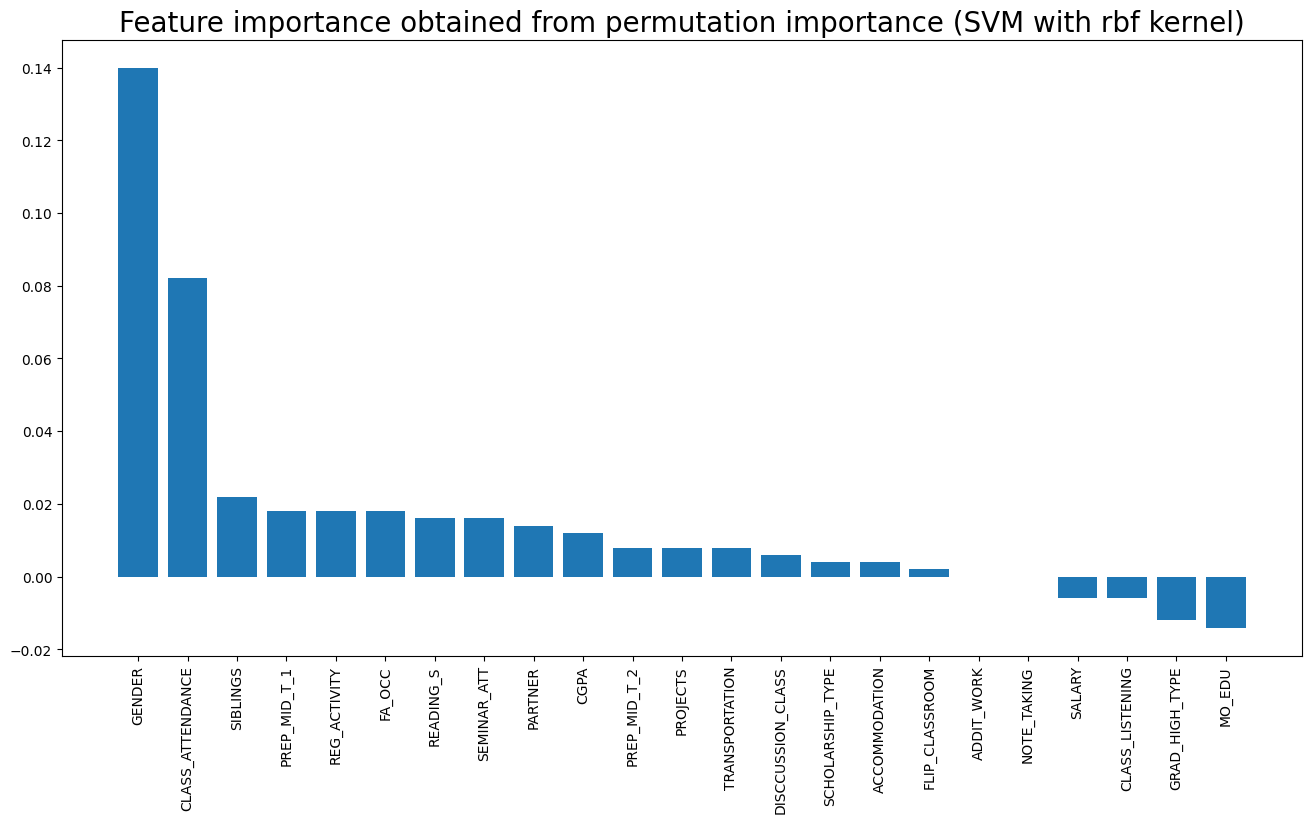

In [45]:
plt.figure(figsize=(16, 8))
plt.bar(x=importances_svm['Attribute'], height=importances_svm['Importance'])
plt.title('Feature importance obtained from permutation importance (SVM with rbf kernel)', size=20)
plt.xticks(rotation='vertical')
plt.show()

## ROC Curve and Confusion matrix

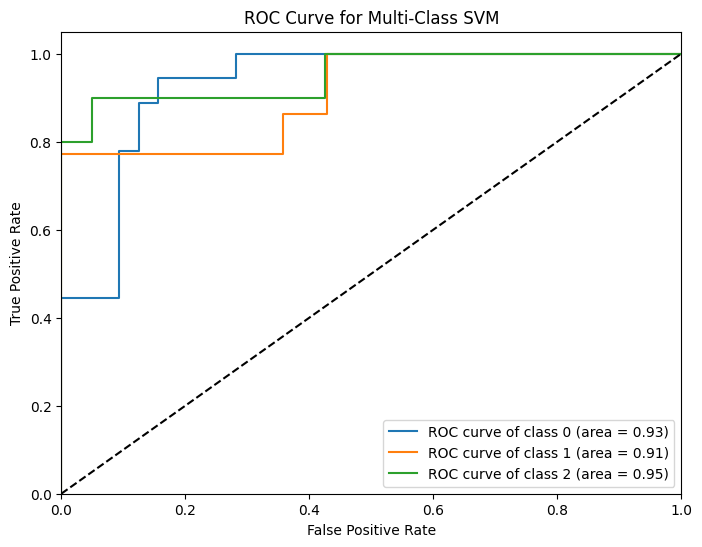

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred_svm' are your true and predicted labels

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get probability estimates for each class
y_score = model_svm.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class SVM')
plt.legend(loc="lower right")
plt.show()

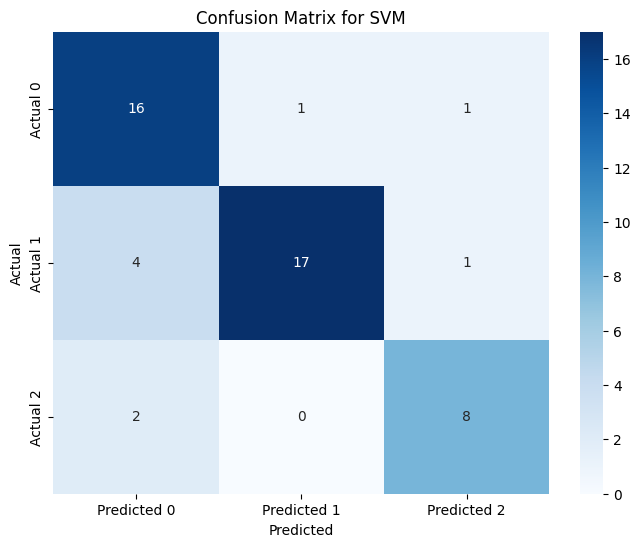

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_svm are already defined from your previous code
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

## Saving the model

In [ ]:
import pickle

# Save the model
with open('model_svm.pkl', 'wb') as model_file:
    pickle.dump(model_svm, model_file)

# Save the scaler
with open('scaler_minmax.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

from google.colab import files
files.download('model_svm.pkl')
files.download('scaler_minmax.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To check the output please [click here](https://student-performance-app-mattjg5ejqywc2rzxb4mwn.streamlit.app/)